# Question 1
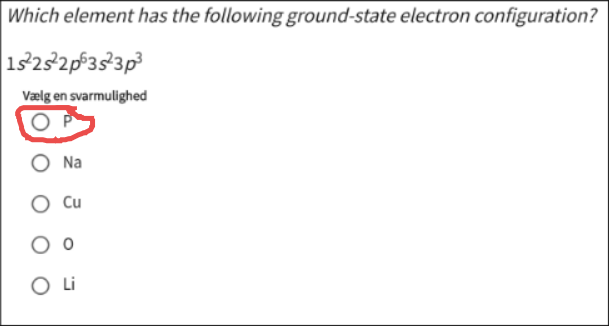

# Question 2
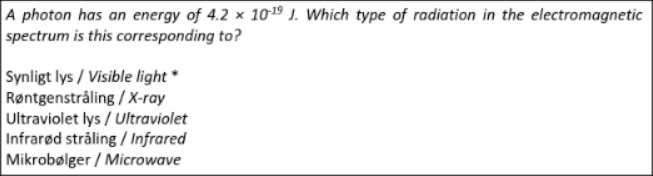

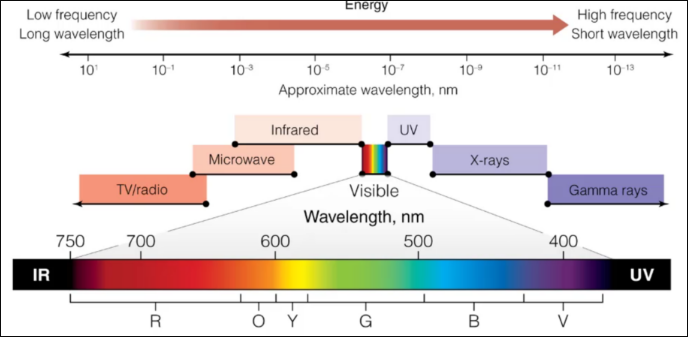

In [1]:
import quantum_mechanics as qm

# --- Given values ---
photon_energy_J = 4.2e-19

# --- Calculation ---
# Step 1: Find the wavelength in meters, then convert to nanometers
wavelength_m = qm.calculate_wavelength_from_energy(photon_energy_J)
wavelength_nm = qm.m_to_nm(wavelength_m)

# Step 2: Classify the radiation
radiation_type = qm.classify_radiation_from_wavelength(wavelength_nm)

# --- Display the result ---
print(f"A photon with energy {photon_energy_J:.1e} J has a wavelength of {wavelength_nm:.0f} nm.")
print(f"This corresponds to: {radiation_type}")

A photon with energy 4.2e-19 J has a wavelength of 473 nm.
This corresponds to: Visible light


# Question 3
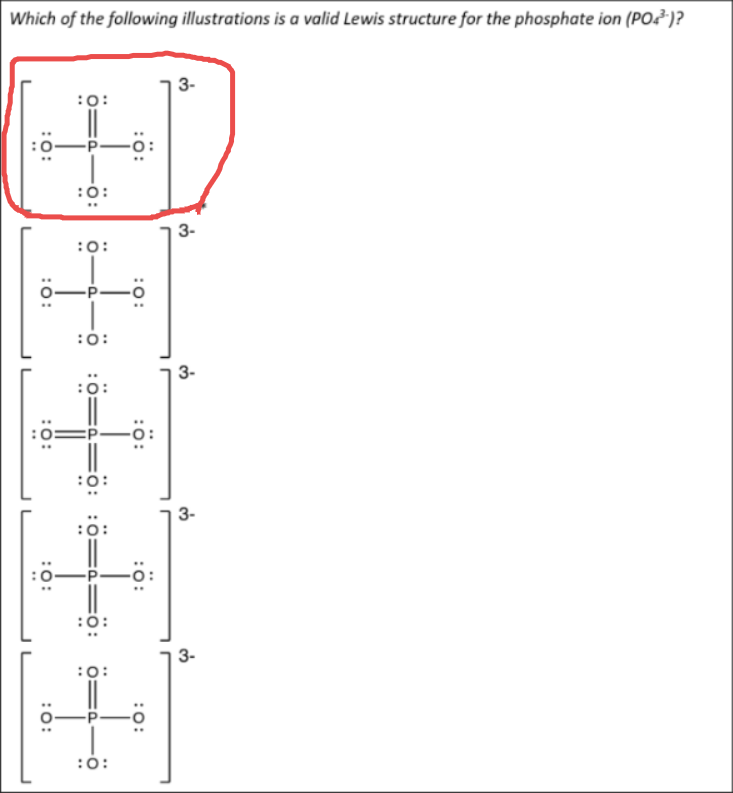

# Question 4
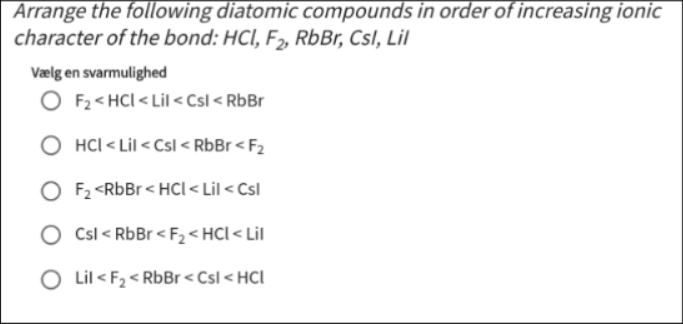


In [2]:
import molecular_structure as ms

# --- Compounds from the problem ---
compounds_to_rank = ["HCl", "F2", "RbBr", "CsI", "LiI"]

# --- Calculation ---
ranked_order = ms.rank_by_ionic_character(compounds_to_rank)

# --- Display the result ---
print("The compounds in order of increasing ionic character are:")
print(ranked_order)


The compounds in order of increasing ionic character are:
F2 < HCl < LiI < CsI < RbBr


# Question 5
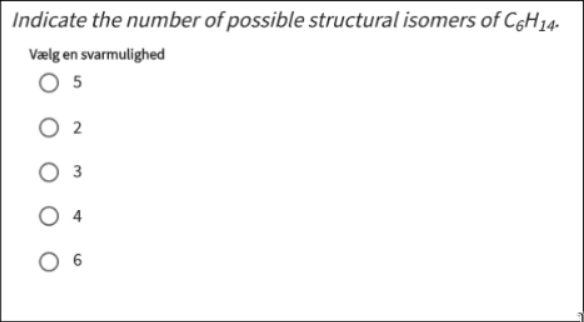

In [3]:
# --- Given formula ---
alkane_formula = "C6H14"

# --- Calculation ---
try:
    num_isomers = ms.count_alkane_isomers(alkane_formula)
    print(f"The number of possible structural isomers for {alkane_formula} is: {num_isomers}")
except (ValueError, NotImplementedError) as e:
    print(e)

The number of possible structural isomers for C6H14 is: 5


# Question 7
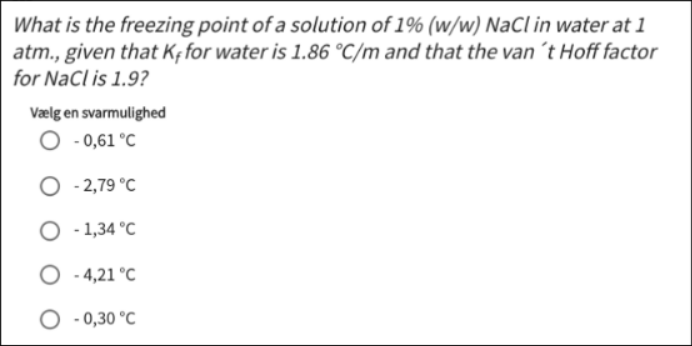

In [4]:
from compound import Compound
import solutions as sol

# --- Given values ---
mass_solute_g = 1.0
mass_solution_g = 100.0
kf_water = 1.86
i_factor = 1.9

# --- Step 1: Calculate Molality ---
# Mass of solvent in kg
mass_solvent_kg = (mass_solution_g - mass_solute_g) / 1000

# Moles of solute
nacl = Compound("NaCl")
nacl.set_mass(mass_solute_g)
moles_solute = nacl.amount_mol

# Molality
molality = sol.calculate_molality(moles_solute, mass_solvent_kg, solvent_unit='kg')

# --- Step 2: Calculate the freezing point depression ---
# This uses your existing function
depression = sol.calculate_freezing_point_depression(
    solute_formula="NaCl", # Note: this argument is used to find 'i', but we'll override it
    molality=molality,
    kf_solvent=kf_water
)

# The function calculate_freezing_point_depression uses an ideal 'i'. We will recalculate with the given 'i'.
depression_real = i_factor * kf_water * molality
final_freezing_point = 0 - depression_real

print(f"The calculated molality is: {molality:.4f} m")
print(f"The freezing point depression is: {depression_real:.2f} °C")
print(f"The final freezing point of the solution is: {final_freezing_point:.2f} °C")


The calculated molality is: 0.1728 m
The freezing point depression is: 0.61 °C
The final freezing point of the solution is: -0.61 °C


# Question 7
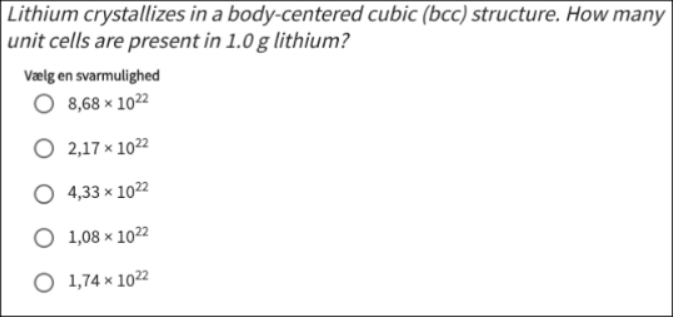

In [6]:
import solid_state as ss

# --- Given values from the problem ---
element = "Li"
mass = 1.0  # g
structure = "BCC"

# --- Calculation ---
unit_cells = ss.calculate_unit_cells_from_mass(
    element_symbol=element,
    mass_g=mass,
    crystal_type=structure
)

print(f"The number of unit cells in {mass} g of {element} is: {unit_cells:.2e}")

The number of unit cells in 1.0 g of Li is: 4.34e+22


# Question 8
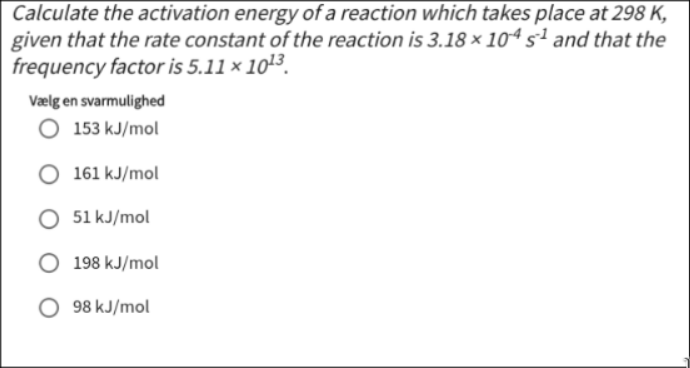

In [7]:
import kinetics as kin

# --- Given values ---
rate_constant = 3.18e-4
frequency_factor = 5.11e13
temperature = 298  # K

# --- Calculation ---
activation_energy_J = kin.calculate_activation_energy(
    k=rate_constant,
    A=frequency_factor,
    T_kelvin=temperature
)

# Convert from J/mol to kJ/mol for the answer
activation_energy_kJ = activation_energy_J / 1000

# --- Display the result ---
print(f"The activation energy is: {activation_energy_kJ:.0f} kJ/mol")

The activation energy is: 98 kJ/mol


# Question 9
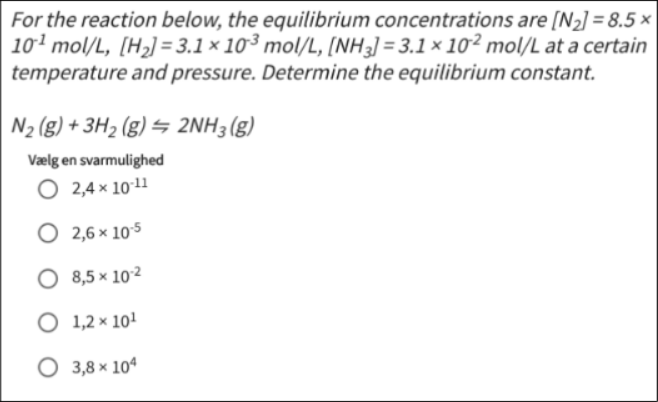

In [8]:
# --- 1. Define the compounds and the reaction ---
from equations import ChemicalEquation
import equilibrium as eq

n2 = Compound("N2"); n2.phase = 'g'
h2 = Compound("H2"); h2.phase = 'g'
nh3 = Compound("NH3"); nh3.phase = 'g'

reaction = ChemicalEquation(reactants=[n2, h2], products=[nh3])

# --- 2. Define the dictionary of equilibrium concentrations ---
concentrations = {
    n2: 8.5e-1,
    h2: 3.1e-3,
    nh3: 3.1e-2
}

# --- 3. Calculation ---
kc_value = eq.calculate_kc(reaction, concentrations)

print(f"The equilibrium constant Kc is: {kc_value:.1e}")

The equilibrium constant Kc is: 3.8e+04


# Question 10
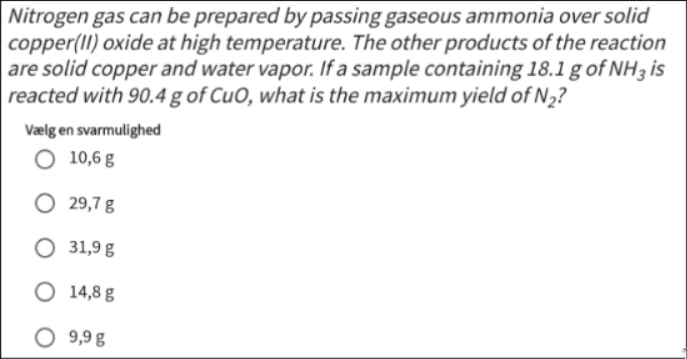

In [9]:
# --- 1. Define the compounds and their initial masses ---
nh3 = Compound("NH3"); nh3.set_mass(18.1)
cuo = Compound("CuO"); cuo.set_mass(90.4)

n2 = Compound("N2")
cu = Compound("Cu")
h2o = Compound("H2O")

# --- 2. Create the chemical equation ---
reaction = ChemicalEquation(
    reactants=[nh3, cuo],
    products=[n2, cu, h2o]
)

# --- 3. Calculate the theoretical yield ---
# The function will automatically balance the equation and find the limiting reactant.
limiting_reagent, yields = reaction.theoretical_yield({
    nh3: nh3.amount_mol,
    cuo: cuo.amount_mol
})

# --- 4. Display the results ---
n2_yield_grams = yields[n2][1] # Get the mass in grams

print(f"The limiting reactant is: {limiting_reagent.name()}")
print(f"The maximum yield of N2 is: {n2_yield_grams:.1f} g")


The limiting reactant is: Copper(II) oxide
The maximum yield of N2 is: 10.6 g


# Question 11
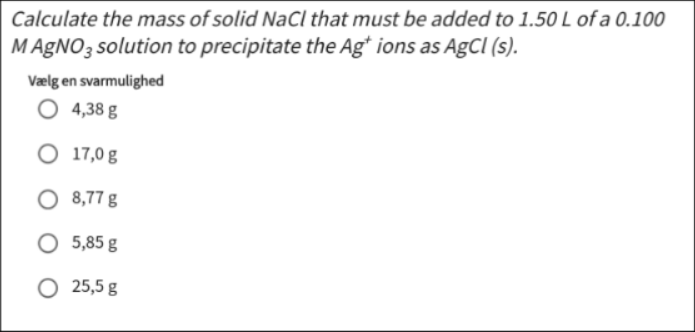

In [10]:
# --- Given values ---
volume_agno3_L = 1.50
molarity_agno3_M = 0.100

# --- Step 1: Calculate moles of AgNO3 (and thus Ag+) ---
moles_ag_ions = molarity_agno3_M * volume_agno3_L

# --- Step 2: Moles of NaCl needed is 1:1 with moles of Ag+ ---
moles_nacl_needed = moles_ag_ions

# --- Step 3: Calculate the required mass of NaCl ---
nacl = Compound("NaCl")
nacl.set_moles(moles_nacl_needed)

print(f"To precipitate all the Ag+ ions, you must add {nacl.mass_g:.2f} g of NaCl.")

To precipitate all the Ag+ ions, you must add 8.77 g of NaCl.


# Question 12
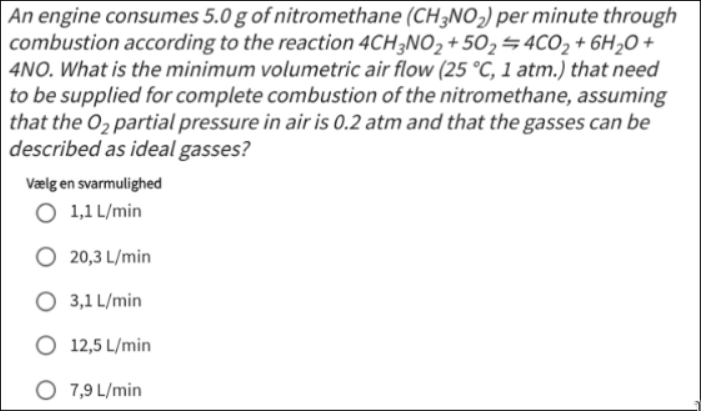